# Traffic on the I-94
## Objective
The objective of this project is to identify some indicators of heavy traffic on westbound I-94 interstate highway.

## About the dataset
The dataset was uploaded to UCI Machine Learning Repo by John Hogue. It is multivariate time series dataset.

The data was collected at a station whih was situated halways between St Paul and Minneapolis.
The station only recorded information on cars that travelled westbound (i.e. from Minneapolis to St Paul).

Below is a table with more information about the variables within the dataset:

|var_name|data_type|description|
|:---|---|---:|
|holiday|Categorical| US National holidays plus regional holiday, Minnesota State Fair|
|temp |Numeric| Average temp in kelvin|
|rain_1h |Numeric| Amount in mm of rain that occurred in the hour|
|snow_1h |Numeric| Amount in mm of snow that occurred in the hour|
|clouds_all |Numeric| Percentage of cloud cover|
|weather_main |Categorical| Short textual description of the current weather|
|weather_description |Categorical| Longer textual description of the current weather|
|date_time |DateTime|Hour of the data collected in local CST time|
|traffic_volume |Numeric| Hourly I-94 ATR 301 reported westbound traffic volume|

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Open file
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

#Enable Jupyer to generate graphs
%matplotlib inline

## Exploration of the dataset
Firstly I am going to explore the dataset:

In [2]:
print(traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


- There seems to be no null values
- This dataset is already very clean and I can see no immediate issues other than the fact that date_time can be represented as a datetime object

In [3]:
print(traffic.head())
print(traffic.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

- As above there is no apparent issues with the dataset and it is already very clean

### Distrubution of traffic volume

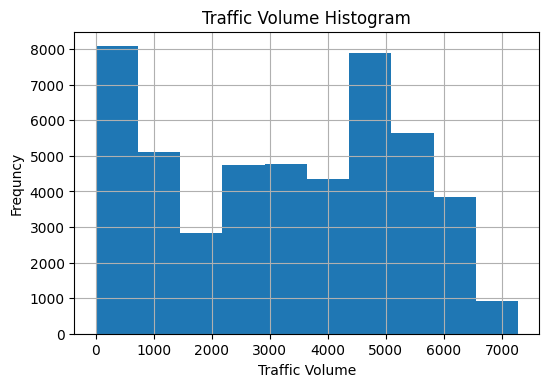

In [4]:
traffic['traffic_volume'].hist()
plt.title('Traffic Volume Histogram')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequncy')
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Majority of the time, around 2000-6000 cars travel westbound through the I-94 per hour.

However the most frequent number of cars that pass through westbound is either 0-750 cars and 4500-5250.

The spike in 0-750 cars per hour might be due to the fact that the dataset also covers really late/early hours of the day where the road may not be busy. 

The same reasoning may apply for the large standard deviation/small lower quartile.

We need to isolate the effects by dividing the dataset into categories based on the hour of the day.

I want to split the time into 2 time periods:

|time_period|label|
|:---|---:|
|6am-8pm|day|
|8pm-6am|night|

In [6]:
#Converting date_time to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
cond = [(traffic['date_time'].dt.hour >= 6)&(traffic['date_time'].dt.hour < 20), ~((traffic['date_time'].dt.hour >= 6)&(traffic['date_time'].dt.hour < 20))]
output = ['day','night']
traffic['day_night'] = np.select(cond, output)
#Now we can use boolean indexing to isolate day and night

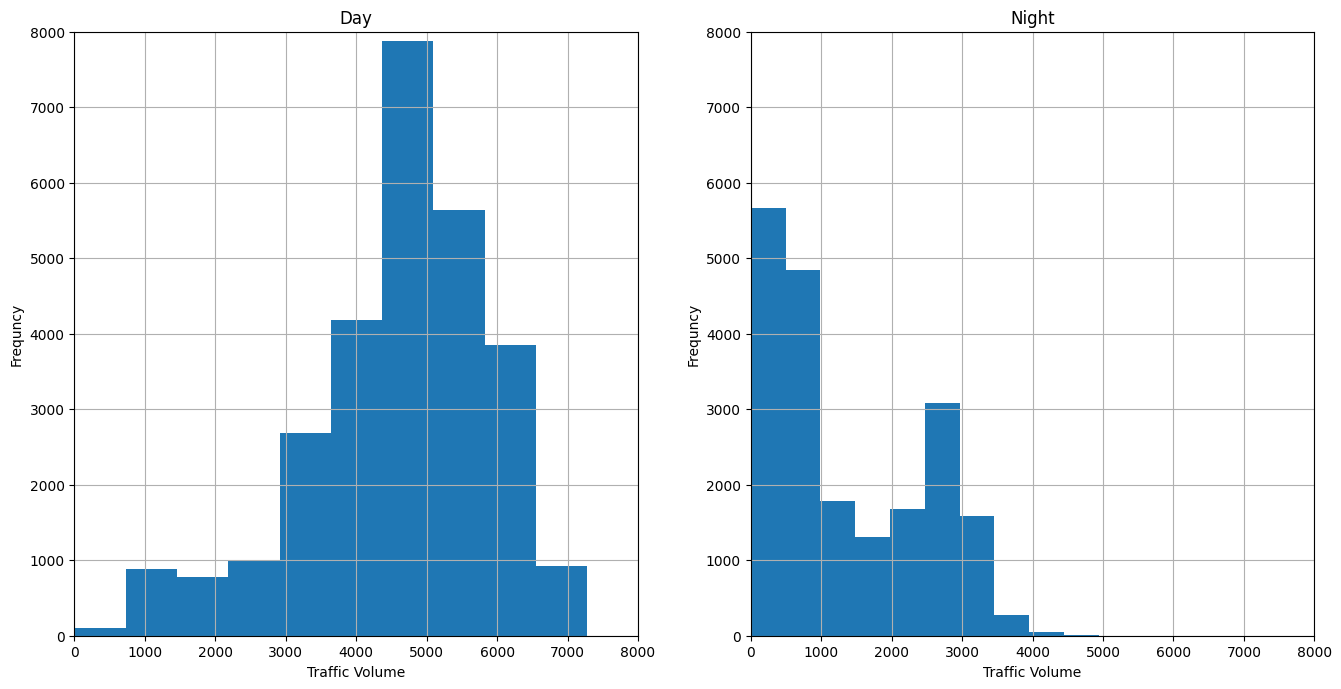

In [7]:
#Histogram for day
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
traffic.loc[(traffic['day_night']=='day'),'traffic_volume'].hist()
plt.title('Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequncy')
plt.ylim([0,8000])
plt.xlim([0,8000])
plt.subplot(1,2,2)
traffic.loc[(traffic['day_night']=='night'),'traffic_volume'].hist()
plt.title('Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequncy')
plt.ylim([0,8000])
plt.xlim([0,8000])

plt.show()

In [8]:
traffic.loc[(traffic['day_night']=='day'),'traffic_volume'].describe()

count    27925.000000
mean      4611.267574
std       1294.808371
min          0.000000
25%       3992.000000
50%       4761.000000
75%       5521.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
traffic.loc[(traffic['day_night']=='night'),'traffic_volume'].describe()

count    20279.000000
mean      1398.818334
std       1047.170978
min          0.000000
25%        441.000000
50%        929.000000
75%       2456.000000
max       4939.000000
Name: traffic_volume, dtype: float64

This confirms my suspicions about the skew to the total histogram is caused by night hours where very little people use the road.

It seems during the day the average number of traffic volume is now much higher (4600) whilst in the night it is around 1398.

Standard deviation is much lower for each subset.

For the day, the distribution seems to be following a slightly left skewed whilst for the night time data, the distribution is heavily right skewed.

For the day, majority of the time, the traffic volume is around 3000 to 6500. Whilst for the night data, it is normally under 3500. 

I believe the night time data may still provide insight into what events may lead to higher levels of traffic volume. It may not be on the same scale as day time however if a factor has an effect on night time congestion, then it is most likely to also affect day time congestion.

However since the objective is to find indicators of heavy traffic, it may not be beneficial to look at night time data as heavy traffic during the night is very rare.

### Exploring traffic volume vs time periods

First indicator I am going to look at is time. Heavy traffic may be a recurring pattern during certain time periods.

In [10]:
traffic_day = traffic.copy()
traffic_day = traffic_day.loc[traffic_day['day_night']=='day',:]

#By month
traffic_day['month']=traffic_day['date_time'].dt.month

by_month = traffic_day.groupby('month')['traffic_volume'].mean()
print(by_month)

month
1     4354.506274
2     4561.668150
3     4697.060550
4     4733.964271
5     4754.816176
6     4750.101802
7     4466.139009
8     4782.513801
9     4719.379909
10    4784.037931
11    4552.144880
12    4227.925219
Name: traffic_volume, dtype: float64


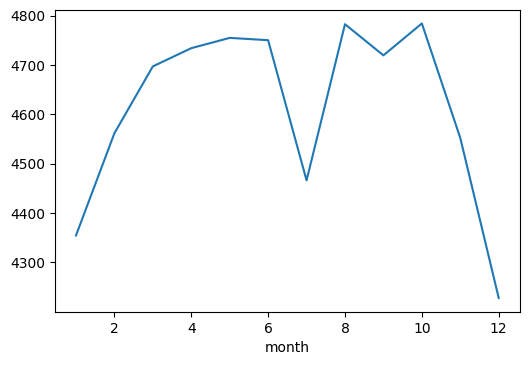

In [11]:
by_month.plot()
plt.show()

There seems to be a seasonal patterns in daily average traffic volume. Summer months tend to reflect higher levels of traffic.

There are several very low values which are interesting corresponding to the months: January, July and December. 

In [12]:
#By day of the week
traffic_day['dotw'] = traffic_day['date_time'].dt.dayofweek
by_dotw = traffic_day.groupby('dotw')['traffic_volume'].mean()
print(by_dotw)

dotw
0    4771.066360
1    5071.712720
2    5171.716737
3    5187.552885
4    5164.136903
5    3697.681496
6    3213.063237
Name: traffic_volume, dtype: float64


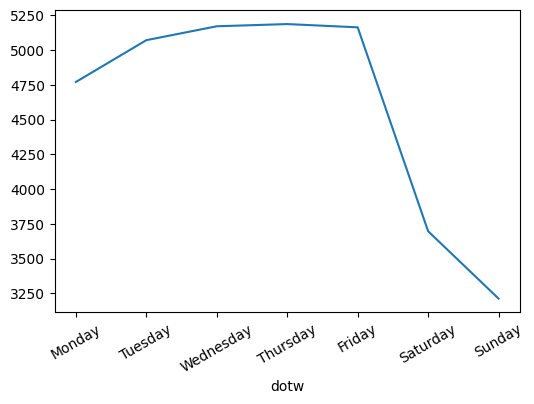

In [13]:
by_dotw.plot()
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 30)
plt.show()

Here there is a very obvious pattern based on weekdays (days where most people have work) are the days where traffic volume are on average higher. There is over a 1000 points difference between a weekday and weekends.

In [14]:
#By time of day
'''Since we have established that weekends on average 
have lower traffic volume, we are going to do weekdays
and weekends seperately'''
#Time of day (weekdays)
traffic_day['hour'] = traffic_day['date_time'].dt.hour
by_hour_day = traffic_day.loc[traffic_day['dotw']<5,:].groupby('hour')['traffic_volume'].mean()
print(by_hour_day)

hour
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64


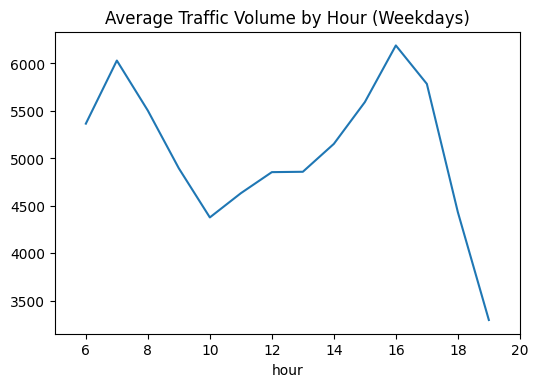

In [15]:
by_hour_day.plot()
plt.title('Average Traffic Volume by Hour (Weekdays)')
plt.xlim([5,20])
plt.show()

In [16]:
#Time of day (weekends)
by_hour_weekends = traffic_day.loc[traffic_day['dotw']>4,:].groupby('hour')['traffic_volume'].mean()
print(by_hour_weekends)

hour
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


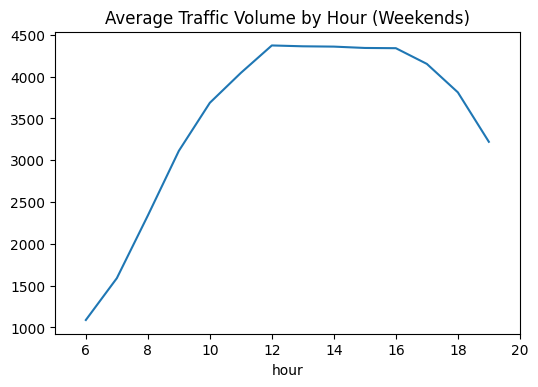

In [17]:
by_hour_weekends.plot()
plt.title('Average Traffic Volume by Hour (Weekends)')
plt.xlim([5,20])
plt.show()

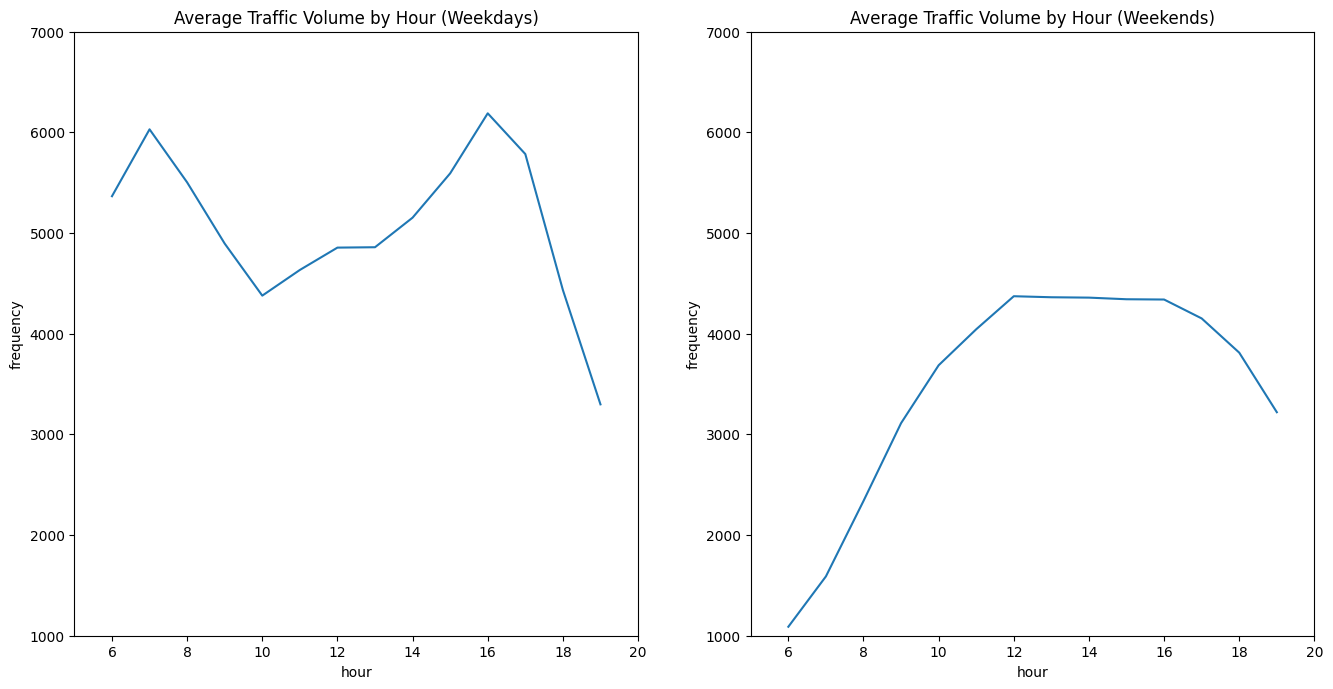

In [18]:
plt.figure( figsize = (16,8))

plt.subplot(1,2,1)

plt.plot(by_hour_day)
plt.title('Average Traffic Volume by Hour (Weekdays)')
plt.xlim([5,20])
plt.ylim([1000,7000])
plt.xlabel('hour')
plt.ylabel('frequency')

plt.subplot(1,2,2)

plt.plot(by_hour_weekends)
plt.title('Average Traffic Volume by Hour (Weekends)')
plt.xlim([5,20])
plt.ylim([1000,7000])
plt.xlabel('hour')
plt.ylabel('frequency')

plt.show()

At all times of the day, traffic during the weekday on average is larger than weekends. 

For weekdays, peak hours are around 6am and 4pm-5pm. These are generally times most people are either going to or leaving work. 

For weekends, the distribution is more even and peak hours are between 10am to 6pm. This seems to be standard traffic flow at normal times for the highway as it matches the non-peak traffic flow during weekdays.

### Exploring traffic volume vs weather indicator

In [19]:
traffic_day.corr().loc[['temp','rain_1h','snow_1h','clouds_all'],'traffic_volume']

temp          0.117139
rain_1h       0.003612
snow_1h       0.003786
clouds_all   -0.024714
Name: traffic_volume, dtype: float64

All these numerical measures of weather exhibit very weak correlation with traffic congestion. The most promising correlation out of the set above is temperature where the hotter the weather is, the larger traffic volume becomes however it is still a weak indicator.

In [20]:
by_weather = traffic_day.groupby('weather_main').mean()['traffic_volume']
by_weather_desc = traffic_day.groupby('weather_description').mean()['traffic_volume']

print(by_weather)
print('')
print(by_weather_desc)

weather_main
Clear           4620.115407
Clouds          4714.868216
Drizzle         4681.174905
Fog             4273.355603
Haze            4533.549403
Mist            4480.231746
Rain            4655.746559
Smoke           4225.857143
Snow            4267.254308
Squall          4211.000000
Thunderstorm    4461.795993
Name: traffic_volume, dtype: float64

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4787.525424
broken clouds                          4685.898565
drizzle                                4560.312321
few clouds                             4689.962250
fog                                    4273.355603
freezing rain                          4314.000000
haze                                   4533.549403
heavy intensity drizzle                4725.972973
heavy intensity rain                   4471.767528
heavy snow                             4234.441734
light intensity drizzle                4741.158371
light int

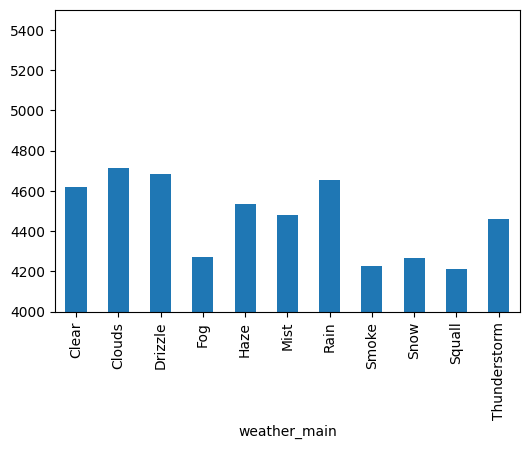

In [27]:
by_weather.plot.bar()
plt.ylim([4000,5500])
plt.show()

None of the indicators exceed a mean traffic volume of 5000 so it is not possible to use these as indicators for heavy traffic. This might be due to the variable being too aggregated, we can have a look at a more granulated variable which is the weather description.

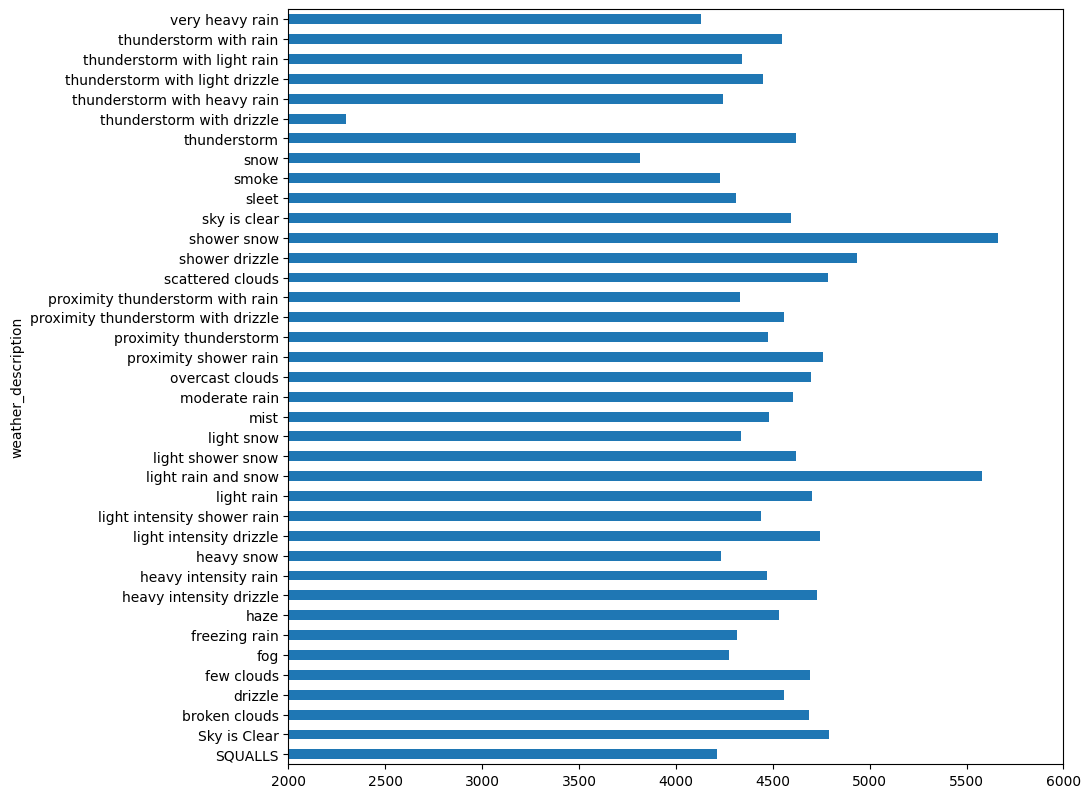

In [26]:
by_weather_desc.plot.barh(figsize = (10,10))
plt.xlim([2000,6000])
plt.show()

There are some weather descriptions which associates with large mean traffic volume:
    - shower snow
    - shower drizzle
    - light rain and snow
These could be used as indicators for heavy traffic. Intuitively, bad weather would mean more people will travel by private vehicles. However, there is no apparent reason as to why these specific weather lead to higher traffic. 

One potential reasoning could be that the weather is not to an extreme where people stay indoors however it is still bad weather so people travel by car to get to their destination as the weather is unpleasant. 

## Conclusion
To conclude there are several indicators that potentially can be used to predict future high traffic volume:
- Current time (gets busier during rush hour 6am and 4pm)
- Whether its weekday/weekend (weekdays are generally busier)
- Whether it is a summer month or not (highway is busier during summer months)
- Several weather indicators include:
    - shower snow
    - shower drizzle
    - light rain and snow